In [1]:
import ciw
import ciw_des_in_sd
import numpy as np
import tqdm
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
def run_trial(trial, number_servers):
    results = {}
    
    N = ciw.create_network(
        arrival_distributions=[ciw_des_in_sd.SolveSDArrivals()],
        service_distributions=[ciw.dists.Exponential(48)],
        number_of_servers=[number_servers])
    
    ciw.seed(trial)
    
    Q = ciw_des_in_sd.HybridSimulation(
        network=N,
        S=200, I=2, M=0, D=0,
        visits_per_day=1/2,
        prop_shop=1/3,
        infection_rate=1,
        recovery_rate=1/14,
        prop_immune=1/4,
        rate_lose_immune=1/75,
        death_rate=1/21)
    
    Q.simulate_until_max_time(365, 50000)
    
    results['t'] = Q.SD.time
    results['S'] = Q.SD.S
    results['I'] = Q.SD.I
    results['M'] = Q.SD.M
    results['D'] = Q.SD.D
    return results

In [3]:
results = []
for trial in tqdm.tqdm(range(10)):
    r = run_trial(trial, 1)
    results.append(r)

100%|██████████| 10/10 [00:56<00:00,  5.58s/it]


In [4]:
all_S = pd.concat([pd.DataFrame({trial: results[trial]['S']}, index=results[trial]['t']).drop_duplicates() for trial in range(10)], join='outer', axis=1)
all_I = pd.concat([pd.DataFrame({trial: results[trial]['I']}, index=results[trial]['t']).drop_duplicates() for trial in range(10)], join='outer', axis=1)
all_M = pd.concat([pd.DataFrame({trial: results[trial]['M']}, index=results[trial]['t']).drop_duplicates() for trial in range(10)], join='outer', axis=1)
all_D = pd.concat([pd.DataFrame({trial: results[trial]['D']}, index=results[trial]['t']).drop_duplicates() for trial in range(10)], join='outer', axis=1)
all_S

0           1           2           3           4  \
0.000000    200.000000  200.000000  200.000000  200.000000  200.000000   
0.001438           NaN  200.000154         NaN         NaN         NaN   
0.002562           NaN         NaN         NaN         NaN         NaN   
0.002684           NaN         NaN         NaN         NaN  200.000287   
0.002709           NaN         NaN         NaN  200.000290         NaN   
...                ...         ...         ...         ...         ...   
364.995097         NaN         NaN   51.147287         NaN         NaN   
364.996709         NaN         NaN         NaN         NaN         NaN   
364.997904         NaN         NaN         NaN         NaN         NaN   
364.998544         NaN         NaN         NaN         NaN   49.680989   
365.000000   49.304734   49.142325   51.147356   47.661986   49.681004   

                     5           6           7           8           9  
0.000000    200.000000  200.000000  200.000000  200.000000  200.000000  
0.001438           NaN         NaN         NaN         NaN         NaN  
0.002562           NaN         NaN         NaN  200.000275         NaN  
0.002684           NaN         NaN         NaN         NaN         NaN  
0.002709           NaN         NaN         NaN         NaN         NaN  
...                ...         ...         ...         ...         ...  
364.995097         NaN         NaN         NaN         NaN         NaN  
364.996709         NaN         NaN         NaN         NaN   49.196136  
364.997904         NaN         NaN         NaN         NaN   49.196147  
364.998544         NaN         NaN         NaN         NaN         NaN  
365.000000   53.473093   50.658617   51.247289   50.479097   49.196168  

[250904 rows x 10 columns]

In [5]:
all_S.interpolate(inplace=True)
all_I.interpolate(inplace=True)
all_M.interpolate(inplace=True)
all_D.interpolate(inplace=True)
all_S

0           1           2           3           4  \
0.000000    200.000000  200.000000  200.000000  200.000000  200.000000   
0.001438    200.000087  200.000154  200.000087  200.000073  200.000096   
0.002562    200.000174  199.999989  200.000174  200.000145  200.000192   
0.002684    200.000261  199.999824  200.000261  200.000218  200.000287   
0.002709    200.000347  199.999659  200.000347  200.000290  200.000348   
...                ...         ...         ...         ...         ...   
364.995097   49.304674   49.142780   51.147287   47.661915   49.680943   
364.996709   49.304689   49.142666   51.147304   47.661932   49.680958   
364.997904   49.304704   49.142552   51.147321   47.661950   49.680973   
364.998544   49.304719   49.142439   51.147339   47.661968   49.680989   
365.000000   49.304734   49.142325   51.147356   47.661986   49.681004   

                     5           6           7           8           9  
0.000000    200.000000  200.000000  200.000000  200.000000  200.000000  
0.001438    200.000087  200.000087  200.000084  200.000137  200.000083  
0.002562    200.000174  200.000174  200.000167  200.000275  200.000166  
0.002684    200.000261  200.000261  200.000251  200.000199  200.000249  
0.002709    200.000347  200.000347  200.000334  200.000123  200.000332  
...                ...         ...         ...         ...         ...  
364.995097   53.473041   50.658570   51.247236   50.479054   49.196116  
364.996709   53.473054   50.658582   51.247249   50.479064   49.196136  
364.997904   53.473067   50.658593   51.247262   50.479075   49.196147  
364.998544   53.473080   50.658605   51.247276   50.479086   49.196158  
365.000000   53.473093   50.658617   51.247289   50.479097   49.196168  

[250904 rows x 10 columns]

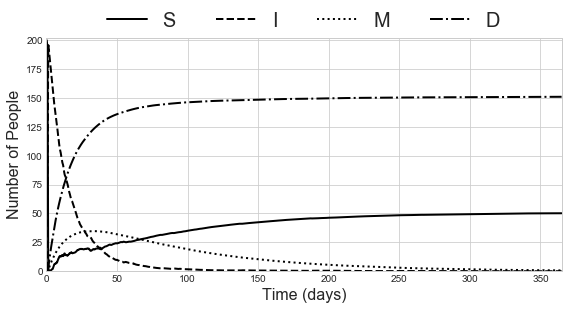

In [6]:
fig, ax = plt.subplots(1, figsize=(8, 4))
ax.plot(all_S.T.mean(), label='S', c='black', linestyle='-', linewidth=2)
ax.plot(all_I.T.mean(), label='I', c='black', linestyle='--', linewidth=2)
ax.plot(all_M.T.mean(), label='M', c='black', linestyle=':', linewidth=2)
ax.plot(all_D.T.mean(), label='D', c='black', linestyle='-.', linewidth=2)
fig.legend(ncol=4, fontsize=20, bbox_to_anchor=(0.9, 1.1))
ax.set_xlabel('Time (days)', fontsize=16)
ax.set_ylabel('Number of People', fontsize=16)
ax.set_ylim(0, 202)
ax.set_xlim(0, 365)
plt.tight_layout()
fig.savefig('../tex/img/desinsd_one_servers.pdf', bbox_inches='tight')

In [7]:
all_D.T.mean()[365]

150.93731203383265

In [8]:
results = []
for trial in tqdm.tqdm(range(10)):
    r = run_trial(trial, 3)
    results.append(r)

100%|██████████| 10/10 [01:48<00:00, 10.72s/it]


In [9]:
all_S = pd.concat([pd.DataFrame({trial: results[trial]['S']}, index=results[trial]['t']).drop_duplicates() for trial in range(10)], join='outer', axis=1)
all_I = pd.concat([pd.DataFrame({trial: results[trial]['I']}, index=results[trial]['t']).drop_duplicates() for trial in range(10)], join='outer', axis=1)
all_M = pd.concat([pd.DataFrame({trial: results[trial]['M']}, index=results[trial]['t']).drop_duplicates() for trial in range(10)], join='outer', axis=1)
all_D = pd.concat([pd.DataFrame({trial: results[trial]['D']}, index=results[trial]['t']).drop_duplicates() for trial in range(10)], join='outer', axis=1)

In [10]:
all_S.interpolate(inplace=True)
all_I.interpolate(inplace=True)
all_M.interpolate(inplace=True)
all_D.interpolate(inplace=True)

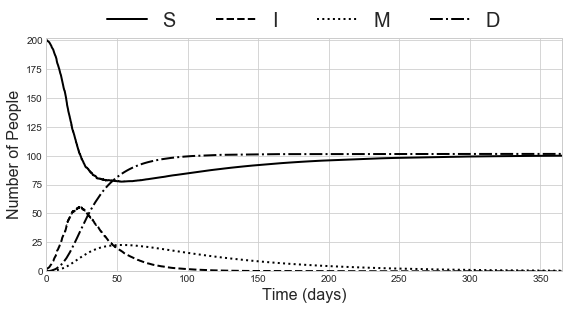

In [11]:
fig, ax = plt.subplots(1, figsize=(8, 4))
ax.plot(all_S.T.mean(), label='S', c='black', linestyle='-', linewidth=2)
ax.plot(all_I.T.mean(), label='I', c='black', linestyle='--', linewidth=2)
ax.plot(all_M.T.mean(), label='M', c='black', linestyle=':', linewidth=2)
ax.plot(all_D.T.mean(), label='D', c='black', linestyle='-.', linewidth=2)
fig.legend(ncol=4, fontsize=20, bbox_to_anchor=(0.9, 1.1))
ax.set_xlabel('Time (days)', fontsize=16)
ax.set_ylabel('Number of People', fontsize=16)
ax.set_ylim(0, 202)
ax.set_xlim(0, 365)
plt.tight_layout()
fig.savefig('../tex/img/desinsd_three_servers.pdf', bbox_inches='tight')

In [12]:
all_D.T.mean()[365]

101.52329338599432